In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [10]:
train_path = "/content/drive/MyDrive/ds_frutas_am/train"
test_path = "/content/drive/MyDrive/ds_frutas_am/test"

In [11]:
#Processing

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
train_set = train_gen.flow_from_directory(train_path, target_size=(64, 64), batch_size=8, class_mode='categorical', shuffle=True)
test_set = test_gen.flow_from_directory(test_path, target_size=(64, 64), batch_size=8, class_mode='categorical', shuffle=False)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [13]:
class_names = list(train_set.class_indices.keys())

In [14]:
images, labels = next(train_set)

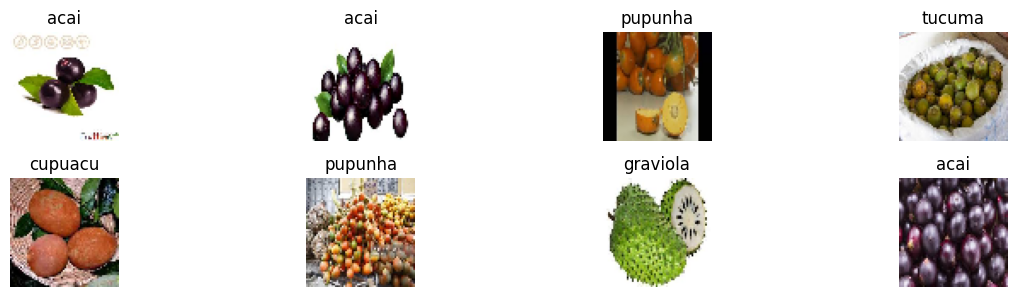

In [19]:
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [65]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.2508 - loss: 2.0736 - val_accuracy: 0.2333 - val_loss: 1.7366
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3480 - loss: 1.6227 - val_accuracy: 0.5333 - val_loss: 1.3748
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4572 - loss: 1.3229 - val_accuracy: 0.4667 - val_loss: 1.2414
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7363 - loss: 0.9666 - val_accuracy: 0.6667 - val_loss: 0.8230
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7759 - loss: 0.5106 - val_accuracy: 0.6667 - val_loss: 0.9034
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8967 - loss: 0.3161 - val_accuracy: 0.6000 - val_loss: 0.9381
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.7931 - loss: 0.5188 - val_accuracy: 0.6333 - val_loss: 1.2370
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9091 - loss: 0.3403 - val_accuracy: 0.666

In [67]:
# Save model
model.save("CNN.h5")

In [68]:

# Save model
model.save("CNN.keras")


In [69]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,877,780 (18.61 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,854 (12.40 MB)

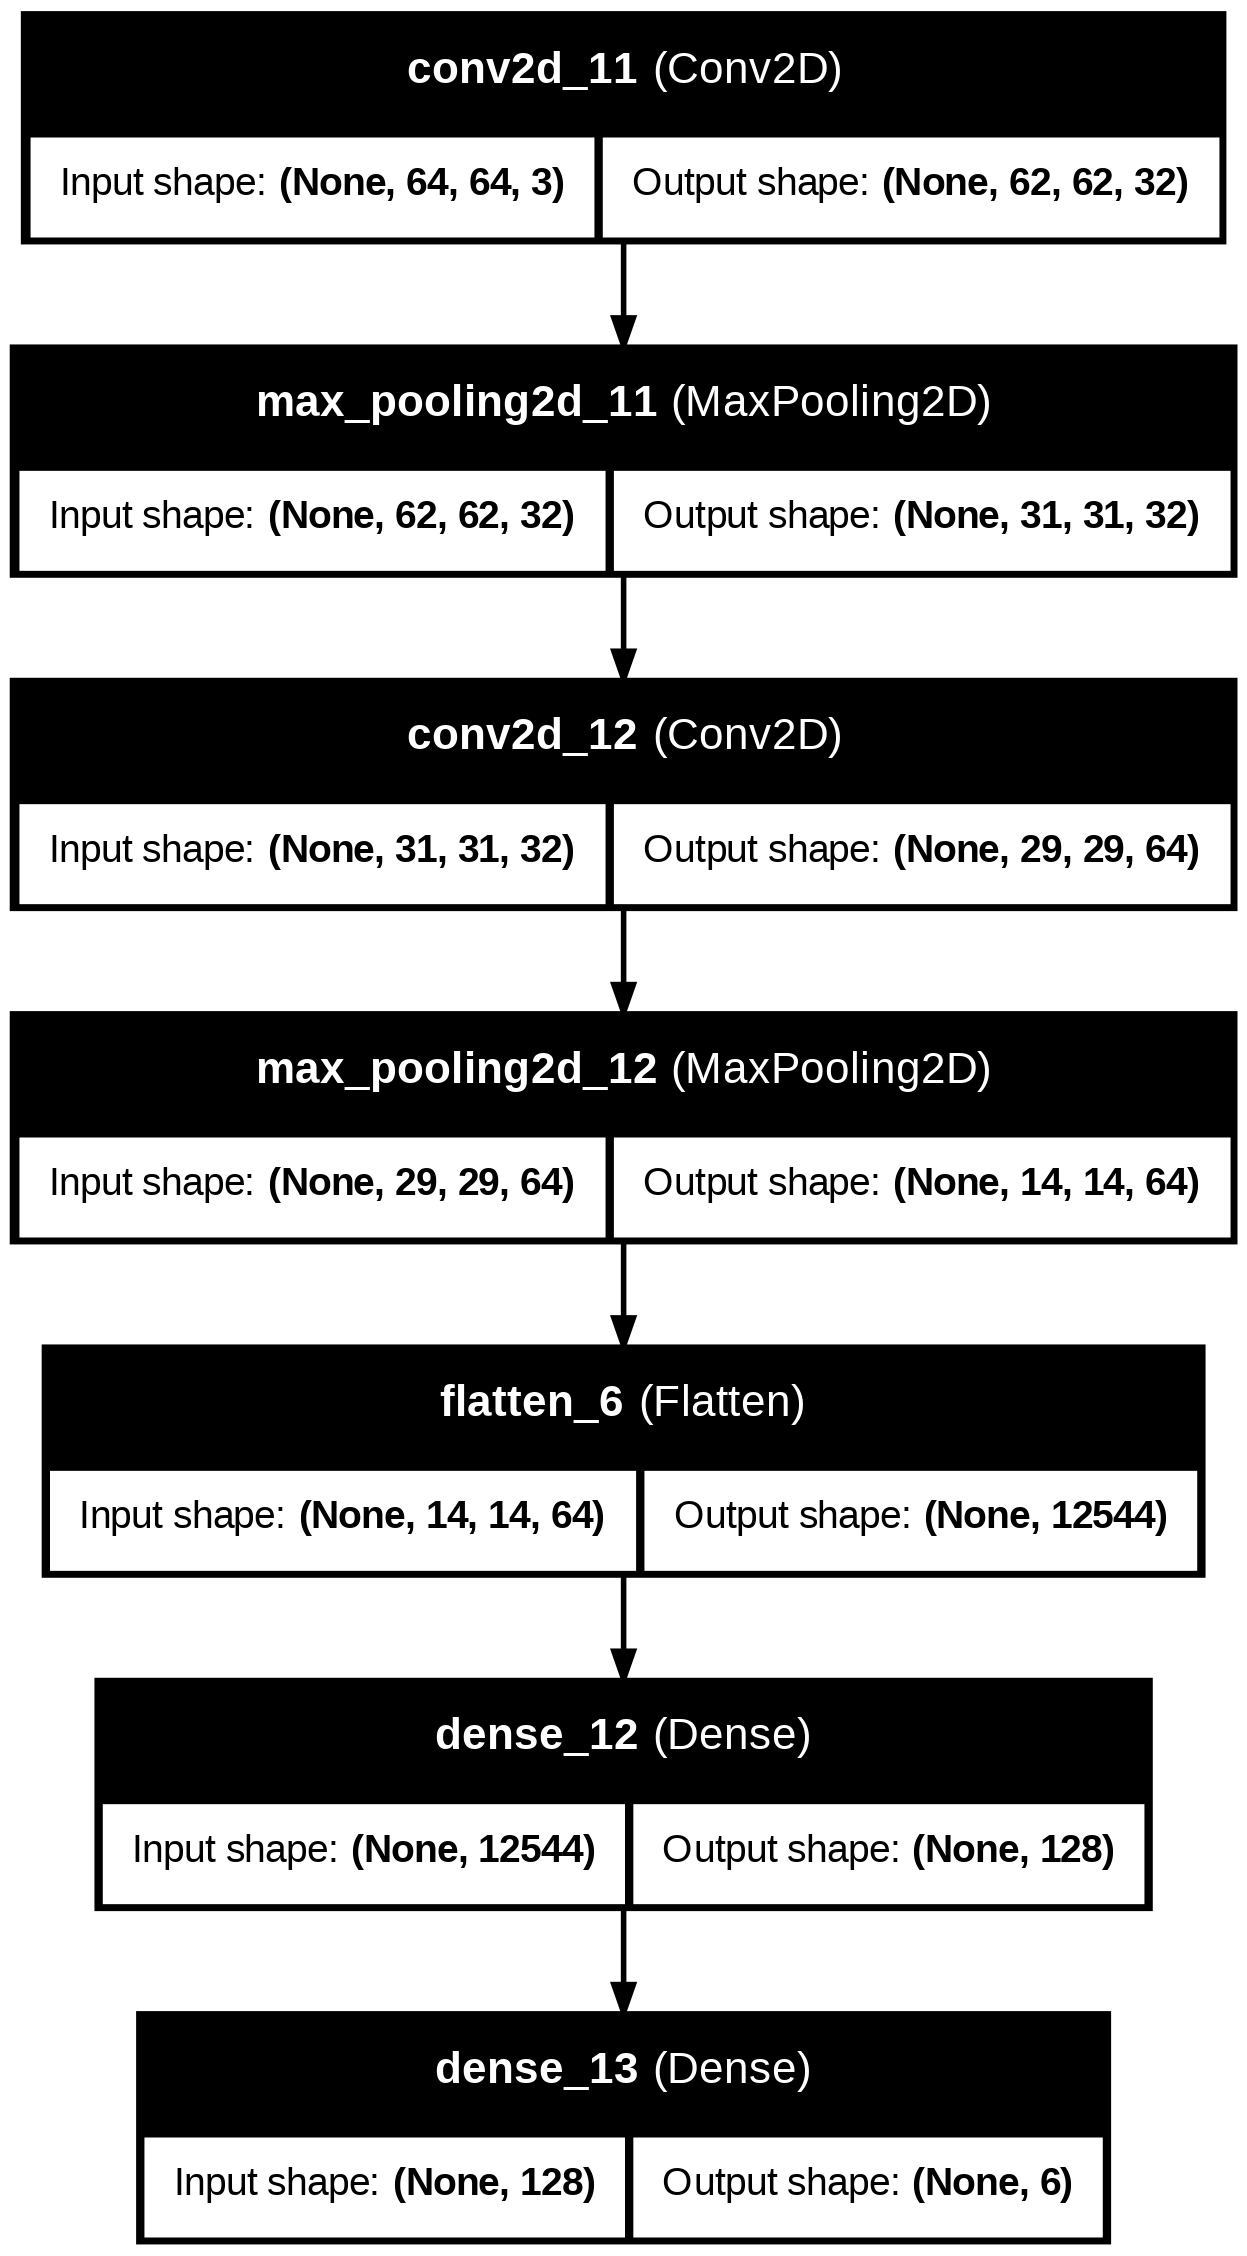

In [70]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='architecture.png', show_shapes=True, show_layer_names=True)


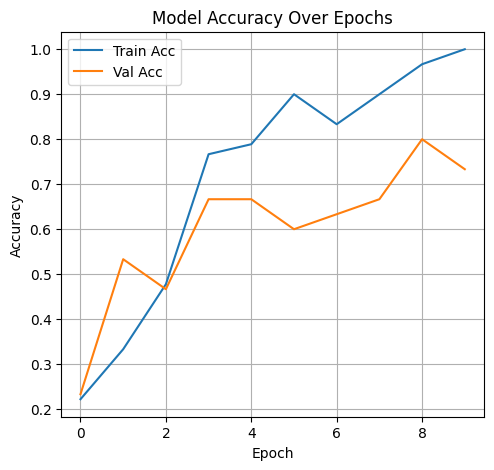

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

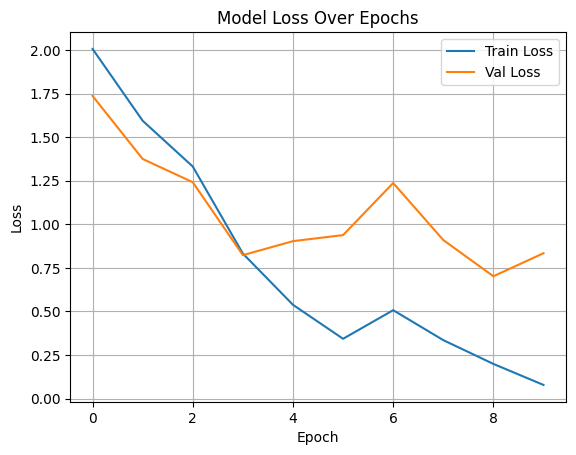

<Figure size 1200x500 with 0 Axes>

In [72]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.figure(figsize=(12,5))
plt.tight_layout()
plt.show()

In [73]:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print("\nClassification Report:\n")
print(classification_report(test_set.classes, y_pred, target_names=list(test_set.class_indices.keys())))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Classification Report:

              precision    recall  f1-score   support

        acai       0.83      1.00      0.91         5
     cupuacu       1.00      0.40      0.57         5
    graviola       0.50      1.00      0.67         5
     guarana       0.71      1.00      0.83         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.73        30
   macro avg       0.84      0.73      0.72        30
weighted avg       0.84      0.73      0.72        30

